0. open
1. review
2. topic

    2.1 언어 모델
    
    2.2 단어 표현
3. Q&A
4. close

# review - 데이터 분리 - 수동

1. X(독립변수), y(종속변수, label) 분리 : zip(), DataFrame, numpy 이용

2. 학습 데이터 / 테스트 데이터 분리 : scikit-learn 라이브러리 제공 method 이용, 수동 분리

## 학습 데이터 / 테스트 데이터 분리 : 수동 분리

In [1]:
import numpy as np

In [2]:
X, y = np.arange(0, 24).reshape((12, 2)), range(12)

In [6]:
print(X)
print(list(y))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [7]:
n_of_train = int(len(X) * 0.8) # 전체 데이터의 80% - 학습 데이터 비율
n_of_test = int(len(X) - n_of_train) # 전체 데이터의 20%

In [8]:
print(n_of_train)
print(n_of_test)

9
3


In [12]:
X_test = X[n_of_train: ]
y_test = y[n_of_train: ]

X_train = X[:n_of_train]
y_train = y[:n_of_train]

In [15]:
print(X_train)
print(list(y_train))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]]
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [16]:
print(X_test)
print(list(y_test))

[[18 19]
 [20 21]
 [22 23]]
[9, 10, 11]


1. 데이터 수집 : crawling/scraping, 공개 data 활용, 공개 API 이용, DB에서 데이터 추출

2. Test Preprocessing : 결측치 처리, Tokenization, Cleaning, Normalization, 표제어/어간 추출, 불용어 처리, Integer Encoding(단어 집합), One-hot Encoding, BPE(OOV 처리), X/y 분리하기, 학습/테스트 데이터 분리

3. ML / DL 학습 : 학습 데이터 / 테스트 데이터

# 언어 모델 (Language Model)

### 언어 모델 (Language Model, LM)은 언어라는 현상을 모델링하고자 단어 시퀀스(문장)에 확률을 할당하는 모델

언어 모델을 작성하는 방법

1) 통계를 이용한 방법

2) Deep Learning을 이용한 방법

### 언어 모델 (Language Model, LM)

단어 시퀀스에 확률을 할당하는 일을 하는 모델

이전 단어들이 주어졌을 때 다음 단어를 예측하는 일

언어 모델링 (Language Modeling) : 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업



### 1. 단어 시퀀스의 확률 할당

1) 기계 번역(Machine Translation) : P(나는 버스를 탔다) > P(나는 버스를 태운다)

2) 오타 교정(Spell Correction) : 선생님이 교실을 부리나케 P(달려갔다) > P(잘려갔다)

3) 음성 인식(Speech Recognition) : P(나는 메롱을 먹었다) < P(나는 메론을 먹었다)

언어 모델은 확률을 통해서 보다 적절한 문장을 판단할 때 활용

## 2. 다음 단어 등장 확률 

조건부 확률(conditional probability) : B라는 일이 발생했을 때 A라는 일이 발생할 확률 P(A|B)

P(wn|w1, w2, ..., wn-1)

단어 예측

## 통계적 언어 모델(Statistical Language Model, SLM)

전통적인 언어 모델

조건부 확률을 이용

### 문장에 대한 확률

P(A|B)
P(wn | w1, w2, w3, ..., wn-1) : w는 단어를 의미

P(An adorable little boy is spreading smlies) 
= P(An) * P(adorable | An) * P(little | An adorable) * P(boy | An adorable little) * P(is | An adorable little boy) * P(spreading | An adorable little boy is) * P(smiles | An adorable little boy is spreading)

* 문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱하는 방법

### 카운트 기반의 접근

P(is | An adorable little boy) = count(An adorable little boy is) / count(An adorable little boy is)

corpus 내에 'An adorable little boy'이 100번 등장하고, 'An adorable little boy is'이 30번 등장한 경우

P(is | An adorable little boy) = count(30) / count(100) = 30%

### 최소 문제(Sparsity Problem) : 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제 ->완화시킬 목적으로 n-gram 언어 모델 사용

## SLM의 한계

1. 훈련 corpus에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점
2. 확률을 계산하고 싶은 문장이 길어질수록 갖고 있는 corpus에서 그 문장이 존재하지 않을 가능성이 높다는 점

해결책으로 참고하는 단어들을 줄이면 확률을 높일 가능성이 있다.

P(is | An adorable little boy) -> P(is | boy)
P(is | An adorable little boy) -> P(is | little boy)

## N-gram

n-gram은 확률을 이용한 통계적 접근 방법을 활용하므로 SLM의 한 종류이고, 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하여 접근하는 방법을 사용

n-gram : 임의의 개수를 정하기 위한 기준을 사용하는 것, n개의 연속적인 단어 나열을 의미

unigram : An, adorable, little, boy, is, spreading, smiles

bigram : An adorable, adorable little, little boy, boy is, is spreading, spreading smiles

trigram : An adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles

4-gram : An adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

An adorable little boy is spreading [?]

SLM : P(smiles | An  adorable little boy is spreading)

n-gram : P(w | boy is spreading) = count(boy is spreading w) / count(boy is spreading)

가지고 있는 또는 훈련에 사용하는 corpus안에 'boy is spreading'이 1000번 등장

'boy is spreading insults'가 500번 등장, 'boy is spreading smiles'가 200번 등장

P(insults | boy is spreading) = 0.5 -> 확률적으로 높으니까 w는 'insults'

P(smiles | boy is spreading) = 0.2

## n-gram 한계

1. n-gram 언어 모델도 희소 문제 존재

2. n을 선택하는 것에 대한 trade-off 문제 -> 통상 n은 5를 넘지 않는 범위에서 결정하길 권장

## SLM(n-gram 포함)의 성능을 높이려면 적용 분야에 맞는 corpus 수집

# NLTK n-gram 기능

In [17]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

In [18]:
sentence = "I am a boy."
tokens = word_tokenize(sentence)
print(tokens)

['I', 'am', 'a', 'boy', '.']


In [22]:
bigram = bigrams(tokens)
trigram = ngrams(tokens, 3)

In [23]:
print("bigram")
for t in bigram:
    print(t)
print("\ntrigram")
for t in trigram:
    print(t)

bigram
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


#### 조건부 확률을 추정할 때는 문장의 시작과 끝이라는 조건을 표시하기 위해 모든 문장에 문자의 시작과 끝을 나타내는 특별 토큰(token)을 추가한다. 예로 문장 시작"SS", 문장 끝"SE" 토큰 사용

In [24]:
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")

In [25]:
for t in bigram:
    print(t)

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


### 조건부 확률 추정 방법

NLTK 패키지를 사용해서 바이그램 형태의 조건부 확률을 추정할 수 있다.

ConditionalFreqDist 클래스로 각 문맥(context)별 단어 빈도를 측정한 후 ConditionalProbDist 클래스를 사용

In [26]:
from nltk import ConditionalFreqDist

In [27]:
sentence = "I am a boy."
tokens = word_tokenize(sentence)
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])

In [28]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [29]:
cfd['SS']

FreqDist({'I': 1})

In [30]:
cfd["I"]

FreqDist({'am': 1})

In [31]:
cfd["boy"]

FreqDist({'.': 1})

#### NLTK 패키지의 sample corpus인 movie_reviews의 텍스트로부터 bigram 확률 추정

In [32]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user/nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to C:\Users\user/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [34]:
sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

sentences[:20]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

#### ConditionalFreqDist 클래스를 이용한 단어의 빈도수 계산

In [35]:
cfd = ConditionalFreqDist(sentences)

#### 문장의 처음에 올 수 있는 단어들

In [36]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

In [38]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [39]:
%matplotlib inline

In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
#matplotlib 폰트 설정
plt.rc('font', family = 'NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


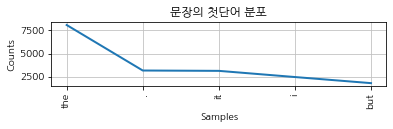

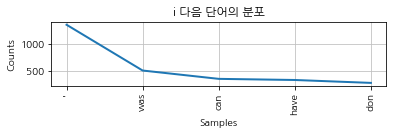

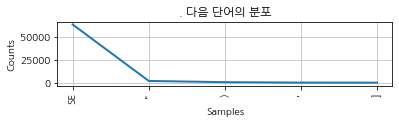

In [45]:
plt.subplot(311)
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.subplot(312)
cfd["i"].plot(5, title="i 다음 단어의 분포")
plt.subplot(313)
cfd["."].plot(5, title=". 다음 단어의 분포")

### NLTK ConditionalProbDist 클래스에 MLEProbDist 클래스 팩토리를 인수로 넣어 빈도 추청을 할 수 있다.

In [46]:
from nltk.probability import ConditionalProbDist, MLEProbDist

In [47]:
cpd = ConditionalProbDist(cfd, MLEProbDist)

#### ConditionalProbDist() 수행이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

In [48]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [49]:
cpd["i"].prob("am")

0.018562267971650354

In [50]:
cpd["i"].prob("was")

0.05692428844639442

In [51]:
cpd["we"].prob("are")

0.08504504504504505

In [52]:
cpd["we"].prob("is")

0.0

### bigram 언어 모형

조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다.

bigram 언어 모형에서 전체 문장의 확률은 다음과 같은 조건부 확률의 곱으로 나타낸다.

P(SS I am a boy SE) = P(I | ss) * P(am | I) * P(a | am) * P(boy | a) * P(. | boy) * P(SE | .)

In [53]:
# 문장(단어 시퀀스)의 리스트를 만든다.
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i+1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
        
    return np.exp(p)

In [55]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [56]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

In [57]:
# 무작위 문장 생성
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()
        
        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w
            
        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
        c = w
        
    return "".join(sentence)

In [58]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."

In [59]:
generate_sentence(3)

'The bugs, by depicting the movie even an excellent australian director asks.'

In [60]:
generate_sentence(2)

'Scorsese as a movie almost painful episode again) is rather than to give away free yourself one.'

### 한글 자료를 이용한 무작위 문장 생성

In [61]:
import codecs

with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
    
docs = [row[1] for row in data]
len(docs)

150000

In [62]:
from konlpy.tag import Okt

In [63]:
okt = Okt()

In [64]:
def tokenize(doc):
    tokens = ['/'.join(t) for t in okt.pos(doc)]
    return tokens

In [65]:
tokenize("그 영화는 아주 재미있었어요")

['그/Noun', '영화/Noun', '는/Josa', '아주/Noun', '재미있었어요/Adjective']

In [66]:
from tqdm import tqdm

sentences = []
for d in tqdm(docs):
    token = tokenize(d)
    bigram = ngrams(token, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

100%|█████████████████████████████████████████████████████████████████████████| 150000/150000 [13:13<00:00, 189.00it/s]


In [67]:
sentences[:30]

[('SS', '아/Exclamation'),
 ('아/Exclamation', '더빙/Noun'),
 ('더빙/Noun', '../Punctuation'),
 ('../Punctuation', '진짜/Noun'),
 ('진짜/Noun', '짜증나네요/Adjective'),
 ('짜증나네요/Adjective', '목소리/Noun'),
 ('목소리/Noun', 'SE'),
 ('SS', '흠/Noun'),
 ('흠/Noun', '.../Punctuation'),
 ('.../Punctuation', '포스터/Noun'),
 ('포스터/Noun', '보고/Noun'),
 ('보고/Noun', '초딩/Noun'),
 ('초딩/Noun', '영화/Noun'),
 ('영화/Noun', '줄/Noun'),
 ('줄/Noun', '..../Punctuation'),
 ('..../Punctuation', '오버/Noun'),
 ('오버/Noun', '연기/Noun'),
 ('연기/Noun', '조차/Josa'),
 ('조차/Josa', '가볍지/Adjective'),
 ('가볍지/Adjective', '않구나/Verb'),
 ('않구나/Verb', 'SE'),
 ('SS', '너/Modifier'),
 ('너/Modifier', '무재/Noun'),
 ('무재/Noun', '밓었/Noun'),
 ('밓었/Noun', '다그/Noun'),
 ('다그/Noun', '래서/Noun'),
 ('래서/Noun', '보는것을/Verb'),
 ('보는것을/Verb', '추천/Noun'),
 ('추천/Noun', '한/Josa'),
 ('한/Josa', '다/Adverb')]

In [73]:
# 단어별 빈도 계산 / 조건부 확률 계산
cfd = ConditionalFreqDist(sentences)
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [74]:
def korea_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

In [75]:
korea_most_common("나", 5)

[('는/Josa', 831),
 ('의/Josa', 339),
 ('만/Josa', 213),
 ('에게/Josa', 148),
 ('에겐/Josa', 84)]

In [76]:
korea_most_common("의", 5)

[('영화/Noun', 19),
 ('연기/Noun', 14),
 ('구심/Noun', 12),
 ('모습/Noun', 9),
 ('감독/Noun', 8)]

In [81]:
korea_most_common(".", 5, "Punctuation")

[('SE', 26503),
 ('영화/Noun', 667),
 ('이/Noun', 565),
 ('정말/Noun', 480),
 ('그리고/Conjunction', 455)]

In [82]:
def korea_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    
    return cpd[context].prob(word)

In [83]:
korea_bigram_prob("이", "영화")

0.4010748656417948

In [84]:
korea_bigram_prob("영화", "이")

0.00015767585785521414

In [85]:
# 무작위 문장 생성
def korea_generate_sentence(seed=None, debug=False):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()
        
        if w == "SE":
            break
        w2 = w.split("/")[0]
        pos = w.split("/")[1]
            
        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ["Josa", "Punctuation", "Suffix"]:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun", "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
        c = w
        
        if debug:
            print(w)
    return "".join(sentence)

In [86]:
korea_generate_sentence(0)

'미키짱과 말도 전혀 빗나가지 않던 전개로 꽥꽥대는거 보니까 요^^'

In [87]:
korea_generate_sentence(2)

'도리까지 본 영화 너무... 뭔가.. 최고네요. 하지만.. 눈물 낫다는건 또 영화에 들지 않는다. 근데 뭐야 어떻게 그렇게 착했던 윤재랑은 에바 그린 드레스 소리 듣는거임""" 에리 욧의 미모로 합성 한 가수 노래와 흥행 놓친 영화다. 사투리 연기 하나 없는 ‘ 스피드 감 넘치는 스릴 넘치는 연기를 이해 되지 못 하시는 분보다 훨 재밌구만 평점을 망처 놓은 듯하다. 영화 보는이로 하여금 불편함을 느꼇을듯'

In [88]:
korea_generate_sentence(5)

'좋았어요... ㅎㄷㄷㄷ 시나리오나 그래픽이 대단한 심리전이 미라 파스틱 함.. 너무 무섭고 나쁜세 끼는 듯 진짜 꼭 필요가 있는지도 모르겠지만 나름 그의 복수 후!!!!!!!!!!!'

# 단어 표현(Word Representation) 방법

1) 국소 표현(Local Representation) 방법 - 이산 표현(Discrete Representation)

    : 해당 단어 그 자체만 보고, 특정값을 mapping하여 단어를 표현하는 방법
    
      단어의 의미, 뉘앙스를 표현할 수는 없다.
      
      예) 강아지, 귀엽다, 사랑스럽다 -> 강아지 : 1, 귀엽다 : 2, 사랑스럽다 : 3

2) 분산 표현(Distributed Representation) 방법 - 연속 표현(Continuous Representation)

    : 해당 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법
    
      단어의 뉘앙스를 표현할 수 있다.
      
      예) 강아지 주변에 (귀엽다, 사랑스럽다) -> 강아지 [귀엽다, 사랑스럽다] 

## Bag of Words(BoW) 

Local Presentation 방법이고 counter base로 단어를 표현

BoW(Bag of Words) : 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

BoW를 만드는 과정

1) 각 단어의 고유한 정수 인덱스를 부여한다.

2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 vector를 만든다.

#### 문서 1: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.

In [90]:
from konlpy.tag import Okt
import re

In [91]:
okt = Okt()

In [92]:
# cleaning
token = re.sub("(\.)", "", "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")

In [93]:
# 형태소 분석
token = okt.morphs(token)
print(token)

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']


In [96]:
# BoW 방식으로 단어 표현
word2index = {}
bow = []
for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
        bow.insert(len(word2index)-1, 1)
    else:
        index = word2index.get(voca)
        bow[index] = bow[index] + 1
        
print(word2index)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [97]:
print(bow)

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


#### BoW에 있어서 중요한 것은 단어의 등장 빈도
#### 단어의 순서, 즉 인덱스의 순서는 전혀 상관없다.

BoW는 각 단어가 등장한 횟수를 수치화하는 단어 표현 방법이기 때문에, 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 사용된다.

즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰인다.

## CountVectorizer 클래스로 BoW 만들기

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
corpus = ['you know I want your love. because I love you']

In [100]:
vector = CountVectorizer()

In [102]:
print(vector.fit_transform(corpus).toarray())

[[1 1 2 1 2 1]]


In [103]:
print(vector.vocabulary_)

{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#### CountVectorizer() 사용 시 주의점
#### 1. 단어 길이가 2 이상인 단어만 토큰으로 인식
#### 2. 토큰화를 띄어쓰기만으로 수행(한글에 적용하면 제대로 결과가 안나온다)